In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import numpy as np
from sklearn.ensemble import RandomForestRegressor

attributes = pickle.load(open( "../pickle/all_attributes.pkl", "rb" ))
attributes_score = pickle.load(open( "../pickle/text_attributes_processed_score.pkl", "rb" ))
clf = pickle.load(open( "../pickle/clf.pkl", "rb" ))
clf["score"] = RandomForestRegressor()
buckets = pickle.load(open( "../pickle/buckets.pkl", "rb" ))
times = pickle.load(open( "../pickle/times.pkl", "rb" ))


In [2]:
exclude = lambda x: x[x.columns.difference(EXCLUDED_COLUMNS)]

train, test = train_test_split(attributes, test_size=0.2, random_state=123)
train_without_exculded = []
test_without_excluded = []
attributes_without_excluded = []

EXCLUDED_COLUMNS = ['id', 'score', 'comms_num', 'buckets', 'buckets_1', 'buckets_2', 'buckets_3', 'buckets_4', 'buckets_5']
train_without_exculded.append(exclude(train))
test_without_excluded.append(exclude(test))
attributes_without_excluded.append(exclude(attributes))

EXCLUDED_COLUMNS = ['id', 'score', 'comms_num', 'buckets', 'buckets_2', 'buckets_3', 'buckets_4', 'buckets_5']
train_without_exculded.append(exclude(train))
test_without_excluded.append(exclude(test))
attributes_without_excluded.append(exclude(attributes))

EXCLUDED_COLUMNS = ['id', 'score', 'comms_num', 'buckets', 'buckets_1', 'buckets_5']
train_without_exculded.append(exclude(train))
test_without_excluded.append(exclude(test))
attributes_without_excluded.append(exclude(attributes))

EXCLUDED_COLUMNS = ['id', 'score', 'comms_num', 'buckets']
train_without_exculded.append(exclude(train))
test_without_excluded.append(exclude(test))
attributes_without_excluded.append(exclude(attributes))

train_score, test_score = train_test_split(attributes_score, test_size=0.2, random_state=123)
EXCLUDED_COLUMNS = ['id', 'score', 'comms_num', 'buckets', 'buckets_1', 'buckets_2', 'buckets_3', 'buckets_4', 'buckets_5']
train_without_exculded_score = exclude(train_score)
attributes_without_excluded_score = exclude(attributes_score)

clf["score"].fit(train_without_exculded_score, train_score["score"])

RandomForestRegressor()

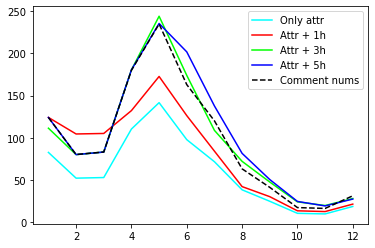

Post id:  l8azdz
Reddit comment count:  1305
Actual comment count:  1289
Timeslot comment count:  1153
Old predicted comments 809.23
New predicted comments sum 708.6314166666667
New predicted comments sum using 1 hour 966.96
New predicted comments sum using 3 hours 1171.63
New predicted comments sum using 5 hours 1244.6799999999998
Score 33741
Score predicted 20725.015916666667


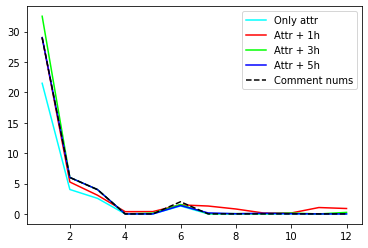

Post id:  l922ub
Reddit comment count:  49
Actual comment count:  41
Timeslot comment count:  41
Old predicted comments 36.93206926406926
New predicted comments sum 29.371579004329007
New predicted comments sum using 1 hour 43.91266666666667
New predicted comments sum using 3 hours 44.720000000000006
New predicted comments sum using 5 hours 40.71
Score 207
Score predicted 289.616457499291


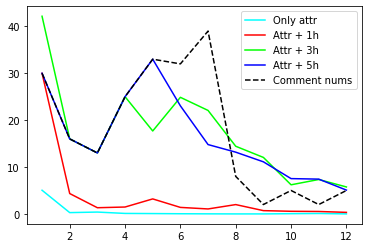

Post id:  l1k2mv
Reddit comment count:  251
Actual comment count:  242
Timeslot comment count:  210
Old predicted comments 14.17965299267944
New predicted comments sum 6.099859108273739
New predicted comments sum using 1 hour 46.885000000000005
New predicted comments sum using 3 hours 206.57000000000002
New predicted comments sum using 5 hours 199.15
Score 4685
Score predicted 1122.4921733656056


In [3]:
bins_count = 12
bin_timeframe = 3600

x  = [i*bin_timeframe/60/60 + 1 for i in range(bins_count)]

def probe_post(post_id ):
    new_prediction = []
    for i in range(4):
        new_prediction.append(clf["multi"][i].predict(attributes_without_excluded[i][attributes['id']==post_id])[0])
    plt.plot(x, new_prediction[0],  color=(0,1,1), label='Only attr')
    plt.plot(x, new_prediction[1],  color=(1,0,0), label='Attr + 1h')
    plt.plot(x, new_prediction[2],  color=(0,1,0), label='Attr + 3h')
    plt.plot(x, new_prediction[3],  color=(0,0,1), label='Attr + 5h')
    plt.plot(x, buckets[post_id], color=(0,0,0), linestyle='--', label='Comment nums')
    plt.legend()
    plt.show()
    print('Post id: ', post_id)
    print('Reddit comment count: ', attributes[attributes['id']==post_id]['comms_num'].to_list()[0])
    print('Actual comment count: ', len(times[post_id]))
    print('Timeslot comment count: ', np.sum(buckets[post_id]))
    print('Old predicted comments', clf["single"].predict(attributes_without_excluded[0][attributes['id']==post_id])[0])
    print('New predicted comments sum', np.sum(new_prediction[0]))
    print('New predicted comments sum using 1 hour', np.sum(new_prediction[1]))
    print('New predicted comments sum using 3 hours', np.sum(new_prediction[2]))
    print('New predicted comments sum using 5 hours', np.sum(new_prediction[3]))
    print('Score', attributes_score[attributes_score['id']==post_id]["score"].to_list()[0])
    print('Score predicted', clf["score"].predict(attributes_without_excluded_score[attributes_score['id']==post_id])[0])

    
probe_post('l8azdz')
probe_post('l922ub')
probe_post('l1k2mv')
# probe_post('l6mqoq')

In [4]:
# for id in test["id"]:
#     probe_post(id)

# Oceny

In [60]:
from sklearn.metrics import r2_score, mean_squared_error

# print(np.sum(test["buckets"].to_list(), axis=1))
# print(test["buckets"].to_list())
pred = clf["single"].predict(test_without_excluded[0])
score = mean_squared_error(pred,test["comms_num"].to_list())
print("old regressor score: ",score)

def score_regressors(clf, test_without_excluded):
    pred = clf.predict(test_without_excluded)
    score = mean_squared_error(np.sum(pred, axis=1),np.sum(test["buckets"].to_list(), axis=1))
    print("score z sumy wszystkich kubełków: ",score)
    for i in range(12):
        pred = clf.predict(test_without_excluded)
        score = mean_squared_error(pred[:,i], np.array(test["buckets"].to_list())[:,i])
        print("kubełek ",i+1,": ",score)


old regressor score:  88544.29560051546


In [61]:
print("Same atrybuty")
score_regressors(clf["multi"][0], test_without_excluded[0])

Same atrybuty
score z sumy wszystkich kubełków:  38160.4166514062
kubełek  1 :  1677.9451270591844
kubełek  2 :  1396.1680564248877
kubełek  3 :  1553.0642508331246
kubełek  4 :  977.1781833760894
kubełek  5 :  638.7890082721482
kubełek  6 :  361.23243227237964
kubełek  7 :  223.41569338066407
kubełek  8 :  123.06857030803164
kubełek  9 :  71.10192862523104
kubełek  10 :  38.50113562241721
kubełek  11 :  29.774367411644445
kubełek  12 :  21.744713603449277


In [62]:
print("Same atrybuty + dane z 1h")
score_regressors(clf["multi"][1], test_without_excluded[1])

Same atrybuty + dane z 1h
score z sumy wszystkich kubełków:  16894.76411460498
kubełek  1 :  13.653482263273478
kubełek  2 :  1007.5634453091578
kubełek  3 :  1018.8672622398528
kubełek  4 :  589.3373719474434
kubełek  5 :  441.3879641554862
kubełek  6 :  258.6079831822815
kubełek  7 :  173.42016293156448
kubełek  8 :  99.81585952891395
kubełek  9 :  60.83824294836298
kubełek  10 :  33.33100031146849
kubełek  11 :  26.408971160657952
kubełek  12 :  19.03025763692988


In [63]:
print("Same atrybuty + dane z 3h")
score_regressors(clf["multi"][2], test_without_excluded[2])

Same atrybuty + dane z 3h
score z sumy wszystkich kubełków:  2999.252126223884
kubełek  1 :  681.0267128033262
kubełek  2 :  3.0003311975197007
kubełek  3 :  15.583742836842776
kubełek  4 :  2.0678326701976486
kubełek  5 :  99.18876605128438
kubełek  6 :  106.66827959685713
kubełek  7 :  86.13385144510127
kubełek  8 :  56.190502416012905
kubełek  9 :  39.359461904890416
kubełek  10 :  21.206261195270656
kubełek  11 :  18.999148519649708
kubełek  12 :  14.588661258453024


In [64]:
print("Same atrybuty + dane z 5h")
score_regressors(clf["multi"][3], test_without_excluded[3])

Same atrybuty + dane z 5h
score z sumy wszystkich kubełków:  1160.3284170026852
kubełek  1 :  15.54478864487792
kubełek  2 :  3.07332388580287
kubełek  3 :  18.862893179175813
kubełek  4 :  1.1378742152176735
kubełek  5 :  0.17112077251001134
kubełek  6 :  49.97893381970517
kubełek  7 :  71.53770191376442
kubełek  8 :  46.251151655527536
kubełek  9 :  33.423470216999384
kubełek  10 :  16.715243353129434
kubełek  11 :  17.43152158120862
kubełek  12 :  13.05087860014921
